In [12]:
import world
import agents
from ff import Solved
import ff
import pddl_functions
from teacher import TeacherAgent
import os
import numpy as np
from scipy.stats import norm
from IPython.display import clear_output
import matplotlib.pyplot as plt
import pandas as pd
import gc
import pickle
from evaluation import plot_cumsum, test_colour_model, ResultsFile, get_agent
import configparser
import logging
from collections import defaultdict
import prob_model
import sqlalchemy
import teacher as tchr

In [2]:
def get_kde_config(config_name):
    model_config = configparser.ConfigParser()
    model_config.read('config/kde.ini')
    model_config = model_config[config_name]
    config_dict = {}
    config_dict['use_3d'] = model_config.getboolean('use_3d')
    config_dict['fix_bw'] = model_config.getboolean('fix_bw')
    config_dict['bw'] = model_config.getfloat('bw')
    config_dict['norm'] = model_config.getfloat('norm')
    return config_dict


In [44]:
problem_dir = 'tworules2'
problems = list(os.listdir('tworules2'))


In [45]:
w = world.PDDLWorld('blocks-domain.pddl', '{}/{}'.format(problem_dir, 'problem25.pddl'))#problems[0]))
teacher = TeacherAgent()
agent = agents.CorrectingAgent(w, teacher=teacher, update_negative=False, 
                               colour_model_type='kde', model_config=get_kde_config('fixed_bw'))

Parsing domain blocks-domain.pddl
Parsing problem tworules2/problem25.pddl


Parsing domain blocks-domain.pddl
Parsing problem onerule/problem1.pddl


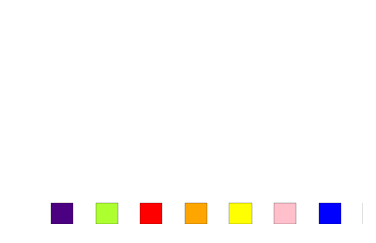

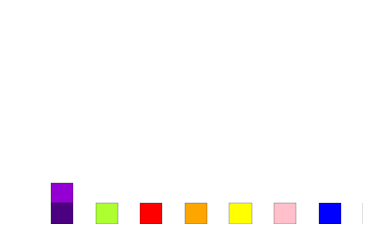

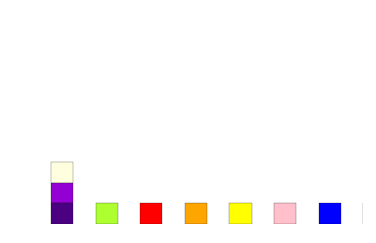

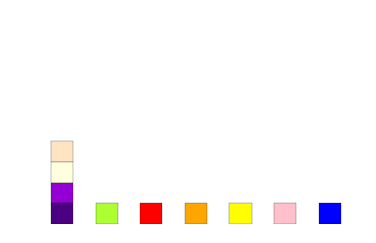

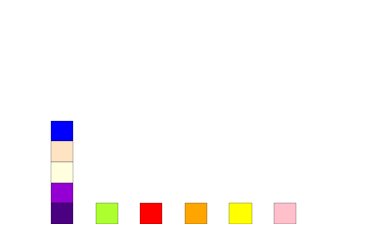

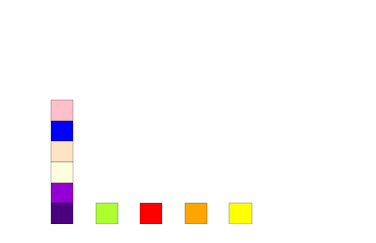

T: No, now you cannot put b1 in the tower because you must put red blocks on blue blocks
1.0 0.0
<prob_model.TableCorrectionModel object at 0x7f52983bd630> [[0.001 0.999]
 [0.    0.   ]]
['b4', 'b5']


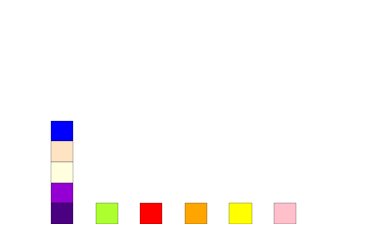

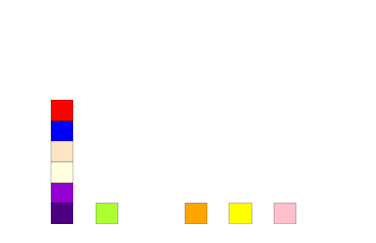

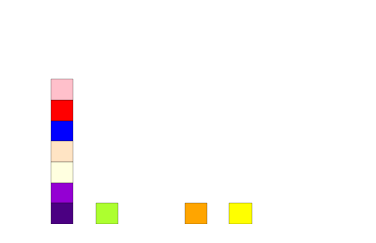

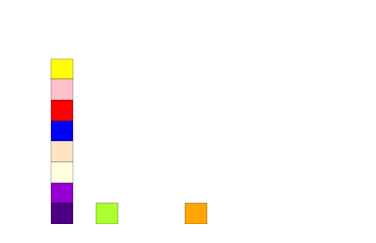

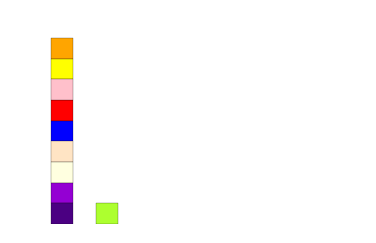

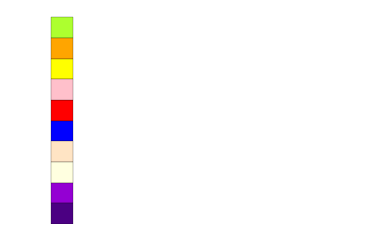

Parsing domain blocks-domain.pddl
Parsing problem onerule/problem10.pddl


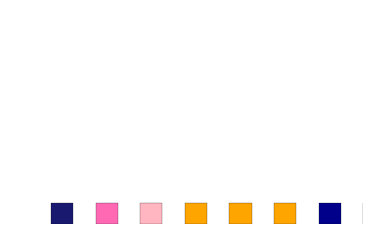

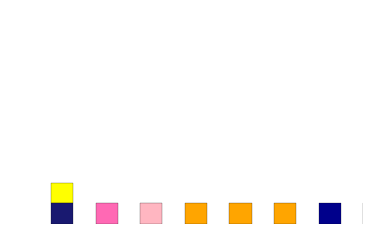

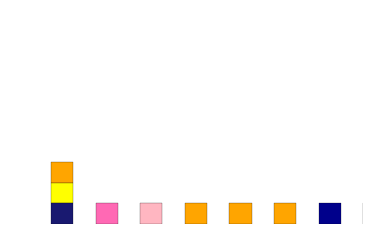

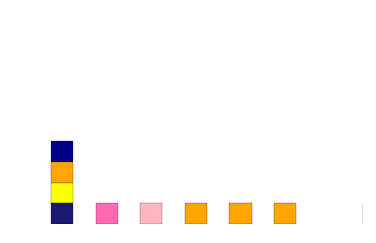

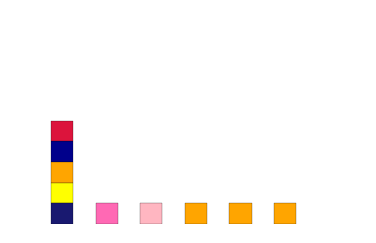

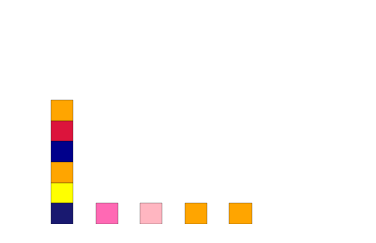

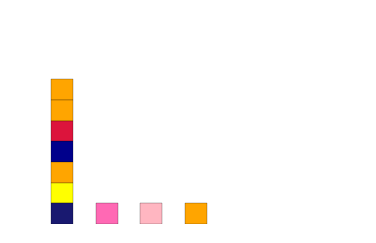

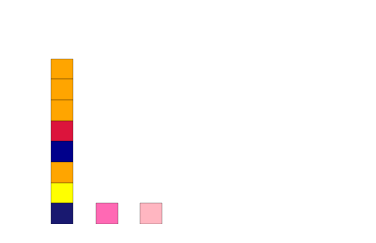

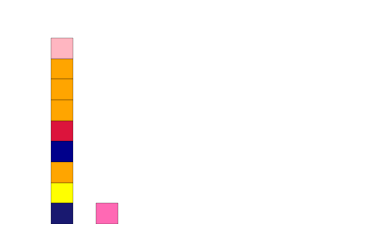

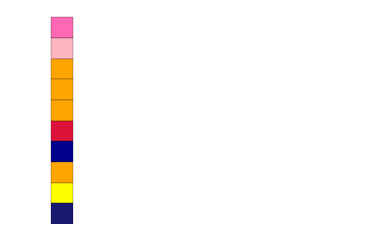

Parsing domain blocks-domain.pddl
Parsing problem onerule/problem11.pddl


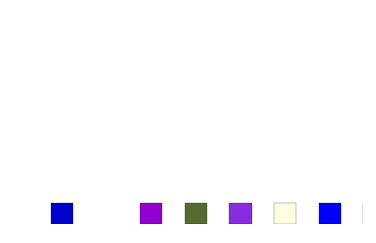

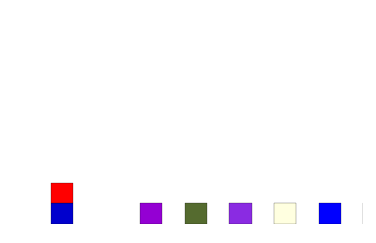

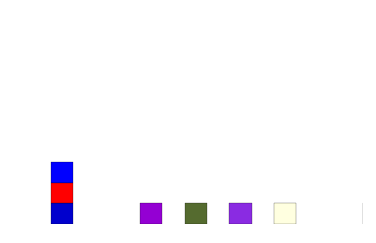

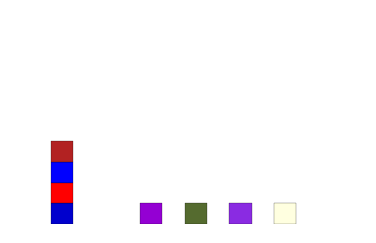

KeyboardInterrupt: 

In [5]:

for problem in problems:
    w = world.PDDLWorld('blocks-domain.pddl', '{}/{}'.format(problem_dir, problem))
    agent.new_world(w)
    while not w.test_success():
        plan = agent.plan()
        for a, args in plan:
            if a == 'reach-goal':
                break
            w.update(a, args)
            w.draw()
            correction = agent.teacher.correction(w)
            if correction:
                print("T: " + correction)
                agent.get_correction(correction, a, args)

                w.draw()
#                 raise ValueError()
                break
                



In [31]:
w.init

In [46]:
w.update('put', ['b0', 't0'])
w.update('put', ['b1', 'b0'])
w.update('put', ['b6', 'b1'])

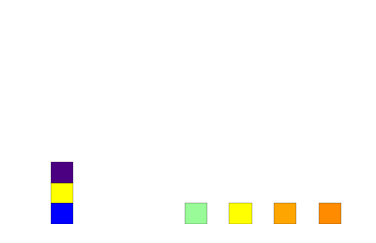

In [47]:
w.draw()

In [50]:
w.problem.goal.asPDDL()


'(and (forall (?x) (in-tower ?x)) (forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y))))) (forall (?y) (or (not (orange ?y)) (exists (?x) (and (purple ?x) (on ?x ?y))))))'

In [49]:
teacher.correction(w)

In [51]:
teacher.answer_question('Is the top object purple?', w)

'no'

In [77]:
print(question)
print(question.replace('Is the top object', '').replace('?', '').strip())

Is the top object purple?
purple


In [57]:
question = 'Is the top object purple?'
colour = question.strip("Is the top object").strip("?").strip()
print(colour)
o1, o2 = tchr.get_top_two(w)
o1_colour = pddl_functions.create_formula(colour, [o1]).get_predicates(True)[0]
o1_is_colour = pddl_functions.predicate_holds(o1_colour, w.problem.initialstate)
if o1_is_colour:
    print("yes")
else:
    print("no")

urple
no


In [37]:
for f in w.state:
    print(f.asPDDL())

(arm-empty )
(on-table b2)
(clear b2)
(on-table b3)
(clear b3)
(on-table b4)
(clear b4)
(on-table b5)
(clear b5)
(clear b6)
(on-table b7)
(clear b7)
(on-table b8)
(clear b8)
(on-table b9)
(clear b9)
(in-tower t0)
(magenta b0)
(pink b0)
(cornflowerblue b1)
(blue b1)
(lightyellow b2)
(yellow b2)
(greenyellow b3)
(green b3)
(yellow b4)
(deepskyblue b5)
(blue b5)
(darkorange b6)
(orange b6)
(bisque b7)
(orange b7)
(yellow b8)
(indigo b9)
(purple b9)
(on b0 t0)
(in-tower b0)
(on b1 b0)
(in-tower b1)
(on b6 b1)
(in-tower b6)


In [11]:
for f in w.problem.initialstate:
    print(f.asPDDL())

(arm-empty )
(on-table b1)
(clear b1)
(on-table b2)
(clear b2)
(on-table b3)
(clear b3)
(on-table b4)
(clear b4)
(clear b6)
(on-table b7)
(clear b7)
(on-table b8)
(clear b8)
(in-tower t0)
(mediumblue b0)
(blue b0)
(darkviolet b1)
(purple b1)
(darkolivegreen b2)
(green b2)
(blueviolet b3)
(purple b3)
(lightyellow b4)
(yellow b4)
(blue b5)
(firebrick b6)
(red b6)
(navy b7)
(blue b7)
(yellow b8)
(red b9)
(on b0 t0)
(in-tower b0)
(on b9 b0)
(in-tower b9)
(on b5 b9)
(in-tower b5)
(on b6 b5)
(in-tower b6)


In [24]:
teacher.answer_question('Is the top object yellow?', w)

'yes'

In [9]:
agent.goal.subformulas
agent.tmp_goal

<Figure size 432x288 with 0 Axes>

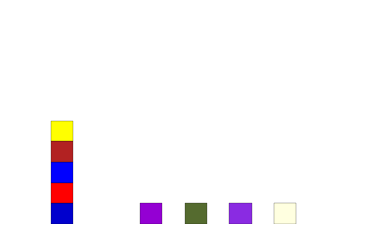

In [19]:
w.draw()

In [15]:
from prob_model import KDEColourModel
from evaluation import test_colour_model, colour_probs, colour_dict, name_to_rgb

In [23]:
cm = KDEColourModel('red', fix_bw=True, bw=0.15)

In [24]:
cm.update([1,0,0], 1)

In [9]:
test_colour_model(cm)

NameError: name 'cm' is not defined

In [15]:
red_cm = agent.colour_models['red']
blue_cm = agent.colour_models['blue']

In [12]:
print(red_cm.data, red_cm.weights)
print(red_cm.data_neg, red_cm.weights_neg)

[[1. 0. 0.]] [1.]
None []


In [13]:
test_colour_model(red_cm)

True Label  R=1 R=0
Predict R=1| 4 | 0 |
        R=0| 1 | 37 |


{'fn': 1, 'fp': 0, 'tn': 37, 'tp': 4}

In [16]:
test_colour_model(blue_cm)

True Label  B=1 B=0
Predict B=1| 3 | 0 |
        B=0| 6 | 33 |


{'fn': 6, 'fp': 0, 'tn': 33, 'tp': 3}

In [13]:
red_cm

In [18]:
red_cm.bw(red_cm.data)

1.0

In [28]:
cm.bw(cm.data)

0.15